In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [237]:
data=pd.read_csv("uber.csv")

In [239]:
df=data.copy()

In [241]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [245]:
df["pickup_datetime"]=pd.to_datetime(df["pickup_datetime"])

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         200000 non-null  int64              
 1   key                200000 non-null  object             
 2   fare_amount        200000 non-null  float64            
 3   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 4   pickup_longitude   200000 non-null  float64            
 5   pickup_latitude    200000 non-null  float64            
 6   dropoff_longitude  199999 non-null  float64            
 7   dropoff_latitude   199999 non-null  float64            
 8   passenger_count    200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2), object(1)
memory usage: 13.7+ MB


In [249]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [251]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [253]:
df.corr

<bound method DataFrame.corr of         Unnamed: 0                            key  fare_amount  \
0         24238194    2015-05-07 19:52:06.0000003          7.5   
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
3         25894730    2009-06-26 08:22:21.0000001          5.3   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
...            ...                            ...          ...   
199995    42598914   2012-10-28 10:49:00.00000053          3.0   
199996    16382965    2014-03-14 01:09:00.0000008          7.5   
199997    27804658   2009-06-29 00:42:00.00000078         30.9   
199998    20259894    2015-05-20 14:56:25.0000004         14.5   
199999    11951496   2010-05-15 04:08:00.00000076         14.1   

                 pickup_datetime  pickup_longitude  pickup_latitude  \
0      2015-05-07 19:52:06+00:00        -73.999817        40.738354   
1      2009-07-17 20:04:56+00:00 

In [255]:
df.dropna(inplace=True)

In [257]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1c71fbaa630>,
 'caps': [<matplotlib.lines.Line2D at 0x1c71fbaabd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c71fbaa3f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c71fbab0b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c71fbab320>],
 'means': []}

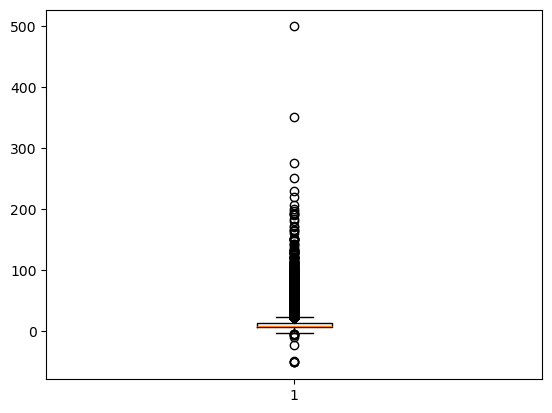

In [259]:
plt.boxplot(df["fare_amount"])

In [261]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.999990e+05,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,2.771248e+07,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,1.601386e+07,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382534e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774524e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155535e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [263]:
q_low=df["fare_amount"].quantile(0.01)
q_hi=df["fare_amount"].quantile(0.99)
df = df[(df["fare_amount"] < q_hi) & (df["fare_amount"] > q_low)]

In [265]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [267]:
x=df.drop("fare_amount",axis=1)
y=df["fare_amount"]

In [269]:
x["pickup_datetime"]=pd.to_numeric(pd.to_datetime(x["pickup_datetime"]))
x=x.loc[:,x.columns.str.contains("^Unnamed")]

In [271]:
print("x shape:", x.shape)
print("y shape:", y.shape)


x shape: (194911, 1)
y shape: (194911,)


In [273]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.949110e+05,194911.000000,194911.000000,194911.000000,194911.000000,194911.000000,194911.000000
mean,2.771159e+07,10.945175,-72.561781,39.955192,-72.571657,39.949673,1.686216
std,1.601527e+07,8.048867,11.359545,7.707129,13.055207,6.733595,1.389057
min,1.000000e+00,3.400000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382375e+07,6.100000,-73.992127,40.735083,-73.991386,40.734125,1.000000
50%,2.773673e+07,8.500000,-73.981927,40.752718,-73.980133,40.753188,1.000000
75%,4.155072e+07,12.500000,-73.967572,40.767236,-73.963936,40.768062,2.000000
max,5.542357e+07,53.100000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [275]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [277]:
lrmodel=LinearRegression()
lrmodel.fit(x_train,y_train)

LinearRegression()

In [281]:
y_pred=lrmodel.predict(x_test)
y_pred

array([10.94554514, 10.94813435, 10.95979683, ..., 10.96465171,
       10.94740411, 10.94930587])

In [283]:
lrmodelrmse = np.sqrt(mean_squared_error(y_pred, y_test))
print("RMSE error for the model is ", lrmodelrmse)

RMSE error for the model is  8.04322245620495


In [286]:
rfrmodel=RandomForestRegressor(n_estimators = 100, random_state = 101)
rfrmodel.fit(x_train,y_train)

RandomForestRegressor(random_state=101)

In [288]:
rfry_pred=rfrmodel.predict(x_test)
rfry_pred

array([17.829 ,  9.415 , 20.558 , ..., 10.907 , 16.0768,  5.91  ])

In [292]:
rfrmodel_rmse = np.sqrt(mean_squared_error(rfry_pred, y_test))
print("RMSE value for Random Forest is:",rfrmodel_rmse)

RMSE value for Random Forest is: 9.765811747032485
